## Authors:
* Margaret Shepherd
* Jason Beal
* Harry Werrell
* Seth Wiseheart



## Documentation

### __Description__

This project uses Euler-Cromer integration to simulate the time evolution of an N-body system of gravitationally interacting objects.

### __Functions__

__read_cluster(filename)__

input: csv file

output: desired data structure

__center_of_mass(cluster_state)__

input: mass and location of every star from data structure

output: location of center of mass of cluster (one location) / format: array of [x,y,z]

__vel_center_of_mass(cluster_state)__

input: velocity and mass of every star from data structure

output: velocity of center of mass (one velocity) / format: array of [Vx,Vy,Vz]

__mechanical_energy(cluster_state)__

input: mass, velocity, and location of every star from data structure

output: a number, total mechanical energy (kinetic + gravitational potential)

__linear_momentum(cluster_state)__

input: mass and velocity of every star from data structure

output: a vector, total linear momentum

__angular_momentum(cluster_state, ref_point)__

input: mass, location, velocity of every star from data structure, and an arbitrary reference point

output: a vector, total angular momentum

__location_distribution_plot(cluster_state, bin_size)__

input: locations of every star 

output: x, y, and z histograms displaying position distribution of stars (one for each location component) for a particular cluster_state (static in time)

__velocity_distribution_plot(cluster_state, bin_size)__

input: velocities of every star 

output: Vz, Vy, and Vz histograms displaying velocity distribution of stars (one for each velocity component) for a particular cluster_state (static in time)

__evolve(cluster_state, time)__

input: entire data structure and desired end time

output: final_cluster_state in the same data structure as before (with new positions and velocities)

__trajectory_plot(cluster_state, delta_t, number_of_points)__

input: entire data structure, step size (maybe bigger than evolve step size), number of points to plot

output: a 2D plot showing the discrete trajectory of every star in the xy plane

## Code

In [ ]:
## Sample data structure. The stars are stored in a list of dictionaries, where
## each dictionary represents a star, and the list itself represents a cluster.
#
# [
#  {"mass": 20.1, "position": [1, 2, 3], "velocity": [0.2, 3.1, 4]},
#  {"mass": 20.1, "position": [1, 2, 3], "velocity": [0.2, 3.1, 4]},
#  {"mass": 20.1, "position": [1, 2, 3], "velocity": [0.2, 3.1, 4]},
#  {"mass": 20.1, "position": [1, 2, 3], "velocity": [0.2, 3.1, 4]}
# ]

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
## Read in csv file ##

# Takes in the name of a csv file (such as "three_body.csv"), and returns a
# representation of that cluster of stars. The cluster is represented as a numpy
# array of stars, where each star is represented as a dictionary, with elements:
# - "mass": a scalar amount of mass
# - "position": a vector containing the x, y, and z coordinates of the star
# - "velocity": a vector containing the x, y, and z components of the star's
#               velocity.
def read_cluster(filename):
  stars_csv = pd.read_csv(filename)
  # Iterates over every row in the dataframe 'stars_csv', retrieves the 
  # corresponding star mass, position, and velocity, groups these in a new
  # dictionary representing that star, and collects those stars in a list.
  cluster_state = []
  for i in range(0, len(stars_csv)):
    mass = stars_csv["mass"][i]
    pos = np.array([stars_csv["x"][i], stars_csv["y"][i], stars_csv["z"][i]])
    vel = np.array([stars_csv["vx"][i], stars_csv["vy"][i], stars_csv["vz"][i]])
    star = {"mass": mass, "position": pos, "velocity": vel}
    cluster_state.append(star)
  return np.array(cluster_state)

In [ ]:
## Center of Mass ##

def center_of_mass(cluster_state):
  m_list = []
  xm_list = []
  ym_list = []
  zm_list = []

  for i in range(0,len(cluster_state)):  # finds the mass of all stars in the dataframe
    m = cluster_state[i]["mass"]
    m_list.append(m)
  mtot = sum(m_list)

  for i in range(0,len(cluster_state)):  # finds the sum of the products of mass and x_pos
    xm = cluster_state[i]["mass"] * cluster_state[i]["position"][0]
    xm_list.append(xm)
  xm_sum = sum(xm_list)

  for i in range(0,len(cluster_state)):  # finds the sum of the products of mass and y_pos
    ym = cluster_state[i]["mass"] * cluster_state[i]["position"][1]
    ym_list.append(ym)
  ym_sum = sum(ym_list)

  for i in range(0,len(cluster_state)):  # finds the sum of the products of mass and z_pos
    zm = cluster_state[i]["mass"] * cluster_state[i]["position"][2]
    zm_list.append(zm)
  zm_sum = sum(zm_list)

  xcom = xm_sum/mtot # center of mass = sum of mass and position, divided by total mass
  ycom = ym_sum/mtot
  zcom = zm_sum/mtot

  center_of_mass = [xcom, ycom, zcom]  # returns array with location of CoM

  return np.array(center_of_mass)

In [ ]:
## Velocity of Center of Mass ##

def vel_center_of_mass(cluster_state):
  total_mass = 0
  for star in cluster_state:
    total_mass += star["mass"]
  return linear_momentum(cluster_state) / total_mass

In [ ]:
## Mechanical Energy ##

# This function takes in cluster_state and returns the total mechanical energy of the system
def mechanical_energy(cluster_state):
  E = []
  # Iterate over each star in the cluster to find it's specific mechanical enegry: Ei = Ki + Ui
  for i in range(len(cluster_state)):
    mi = cluster_state[i]["mass"]
    vi = cluster_state[i]["velocity"]
    magvi = np.sqrt(vi[0]**2 + vi[1]**2 + vi[2]**2)
    ri = cluster_state[i]["position"]
    G = 1.0
    Ki = 0.5 * mi * magvi**2
    Ui = 0.0
    # Iterate again over each star in the cluster to find the gravitational potential energy between stars
    for j in range(i+1, len(cluster_state)):
      if i != j: # Note i != j so we don't self count
        mj = cluster_state[j]["mass"]
        rj = cluster_state[j]["position"]
        r = ri - rj
        magr = np.sqrt(r[0]**2 + r[1]**2 + r[2]**2)
        Ui = Ui - 1.0 * G * mi * mj / magr # Note the 0.5 so we don't double count
    # Then we compute the mechanical energy for the i-th star and append it to a list of all the mechanical energies
    Ei = Ki + Ui
    E.append(Ei)
  # Then we sum this list to get the total mechanical enegry of the system
  return sum(E)

In [ ]:
## Linear Momentum ##

# Takes in a cluster state (as specified in read_cluster), and returns a vector
# representing the linear momentum of the center of mass of the system (the
# total linear momentum of the system)
def linear_momentum(cluster_state):
  total_momentum = np.zeros(3)
  for star in cluster_state:
    momentum = star["mass"] * star["velocity"]
    total_momentum = total_momentum + momentum
  return total_momentum

In [ ]:
## Angular Momentum ##

def angular_momentum(cluster_state, ref_point):
## Returns the total angular momentum of the stars in a given cluster state with respect to a given reference point.
## The form of the output is a numpy array containing the components in the order [x, y, z].
  sumL = np.zeros(3)
  for star in cluster_state:
    mass = star["mass"]
    v_angular = np.cross((star["position"] - ref_point), star["velocity"])
    localL = mass*v_angular
    sumL = sumL + localL
  return sumL

In [ ]:
## Main Distribution Plot function ##

# Can use for BOTH location distribution plot and velocity distribution plot
def distribution_plot(cluster_state, nbins, component, quantity):  
# nbins is an integer, component is a string, quantity is a string
# component is asking for "x", "y", or "z"
# quantity is asking whether we want "position" or "velocity"
  pos_component_dict = {"x": 0, "y": 1, "z": 2}
  direction_array = []
  for i in range(0,len(cluster_state)):
    direc = cluster_state[i][quantity][pos_component_dict[component]]
    direction_array.append(direc)
  plt.hist(direction_array, bins=nbins, label=component + " " + quantity)
  plt.title(quantity + " Histogram for " + component + " Component")
  plt.ylabel("Count")
  plt.legend()

In [ ]:
## Evolve over time ##

# Evolves the state of the star cluster represented by 'cluster_state' over a
# period of time 'time'. Optionally accepts a number of iterations to calculate
# over.
def evolve(cluster_state, time, iterations=200, optimized=True):
  dt = time/iterations
  evolved_state = cluster_state
  for i in range(iterations):
    if optimized:
      evolved_state = evolve_step_optimized(evolved_state, dt)
    else:
      evolved_state = evolve_step_conventional(evolved_state, dt)
  return evolved_state

# Uses Euler-Cromer integration to numerically approximate the changes in
# position and velocity of a cluster of stars represented by 'initial_state'
# over a time step of size 'dt'.
def evolve_step_conventional(initial_state, dt):
  cluster_state = []
  # Iterate over every star in the initial state, and determine the force of
  # attraction between it and every other star. Use this force to update its
  # position and velocity.
  for i in range(len(initial_state)):
    mi = initial_state[i]["mass"]
    ri = initial_state[i]["position"]
    vi = initial_state[i]["velocity"]
    Fi = 0.0
    # Compares star i to every other star in the list.
    for j in range(len(initial_state)):
      # Skip this 'j' value if it corresponds to star i (no gravitational
      # attraction to itself)
      if i != j:
        mj = initial_state[j]["mass"]
        rj = initial_state[j]["position"]
        r = rj - ri
        magr = np.linalg.norm(r)
        # Fij is the force acting between star i and star j. Fij is a vector,
        # pointing in the direction of vector r (from star i to star j)
        Fij = 1.0 * mi * mj * r / magr**3
        Fi = Fi + Fij
    # Fi is now the net force acting on star i.
    pi = mi*vi + Fi*dt
    vi = pi / mi
    ri = ri + vi*dt
    new_star = {"mass": initial_state[i]["mass"], "position": ri, "velocity": vi}
    cluster_state.append(new_star)
  return np.array(cluster_state)

# Calculates the state of the star cluster described in 'initial_state' after a
# time step of 'dt'. Returns the updated state.
# Takes advangtage of equal and opposite force pairs to reduce the number of
# operations required to calculate the state, when compared to the conventional
# method.
def evolve_step_optimized(initial_state, dt):
  cluster_state = []
  length = len(initial_state)
  # 'force_on_star' stores the net force acting on each star contained in the
  # initial state. 'force_on_star[i]' is the net force on star 'i'. It's
  # initialized as a list of 3D numpy zero vectors.
  force_on_star = []
  for i in range(length):
    force_on_star.append(np.zeros(3))
  # Iterates over every star in the initial state. Takes advantage of equal and
  # opposite force pairs to calculate interactions for only half of the stars.
  for i in range(length):
    mi = initial_state[i]["mass"]
    ri = initial_state[i]["position"]
    # Because this range begins at i+1, every star interaction pair will be
    # calculated only once.
    for j in range(i+1, length):
      mj = initial_state[j]["mass"]
      rj = initial_state[j]["position"]
      r = rj - ri
      magr = np.linalg.norm(r)
      # Fij is the force acting between star i and star j. Fij is a vector,
      # pointing in the direction of vector r (from star i to star j)
      Fij = 1.0 * mi * mj * r / magr**3
      # Force interaction pairs are equal and opposite, so Fij is added to one
      # star's net force, and subtracted from the other. Order is not important.
      force_on_star[i] += Fij
      force_on_star[j] -= Fij
  # Uses final force totals in force_on_star to create an updated cluster state,
  # shifting the positions and velocities of each star according to the forces
  # between them.
  for i in range(length):
    mi = initial_state[i]["mass"]
    ri = initial_state[i]["position"]
    vi = initial_state[i]["velocity"]
    Fi = force_on_star[i]
    pi = mi*vi + Fi*dt
    vi = pi / mi
    ri = ri + vi*dt
    new_star = {"mass": mi, "position": ri, "velocity": vi}
    cluster_state.append(new_star)
  return np.array(cluster_state)

In [ ]:
## Make Trajectory Plots ##

colors = ["firebrick", "mediumorchid", "dodgerblue", "rebeccapurple", "lightsalmon", "paleturquoise", "cornflowerblue", "aquamarine", "palegoldenrod", "darkseagreen"]
# Reference this link https://matplotlib.org/3.1.0/gallery/color/named_colors.html
# for more colors, see the CSS section

def trajectory_2d_plot(cluster_state, delta_t, number_of_points):
  state = cluster_state
  plt.axes().set_aspect('equal')
  # plt.xlim(-20.0, 20.0)
  # plt.ylim(-20.0, 20.0)
  for i in range(number_of_points):
    for j in range(len(state)):
      c = colors[j % len(colors)]
      x_coords = state[j]["position"][0]
      y_coords = state[j]["position"][1]
      plt.scatter(x_coords, y_coords, color=c)
    state = evolve(state, delta_t)
  plt.xlabel("x")
  plt.ylabel("y")
  plt.show()
  return state

def trajectory_3d_plot(cluster_state, delta_t, number_of_points):
  state = cluster_state
  fig = plt.figure()
  ax = plt.axes(projection='3d')
  for i in range(number_of_points):
    x_coords = []
    y_coords = []
    z_coords = []
    for j in range(len(state)):
      c = colors[j % len(colors)]
      x_coords = state[j]["position"][0]
      y_coords = state[j]["position"][1]
      z_coords = state[j]["position"][2]
      ax.scatter3D(x_coords, y_coords, z_coords, color=c)
    state = evolve(state, delta_t)
  ax.set_xlabel("x")
  ax.set_ylabel("y")
  ax.set_zlabel("z")
  plt.show()
  return state

In [ ]:
## Make All Distribution Plots ##

def location_distribution_plot(cluster_state, nbins):
# Calls distribution_plot function, for position, once for each component
  distribution_plot(cluster_state, nbins, "x", "position")
  distribution_plot(cluster_state, nbins, "y", "position")
  distribution_plot(cluster_state, nbins, "z", "position")
  plt.title("Position Distribution")
  plt.xlabel("Position")
  plt.show()

def velocity_distribution_plot(cluster_state, nbins):
# Calls distribution_plot function, for velocity, once for each component
  distribution_plot(cluster_state, nbins, "x", "velocity")
  distribution_plot(cluster_state, nbins, "y", "velocity")
  distribution_plot(cluster_state, nbins, "z", "velocity")
  plt.title("Velocity Distribution")
  plt.xlabel("Velocity")
  plt.show()

# Distribution plot for distance (all components combined) of stars from a reference point
def r_distribution_plot(cluster_state, ref_point, nbins):
# ref_point takes array in the format [0,0,0]
  r_array = []
  for i in range(0,len(cluster_state)):
    # finds the distance from the reference point by taking the square root
    # of the squares of each component of the distance of star from the reference point
    r = np.sqrt((cluster_state[i]["position"][0] - ref_point[0])**2 + (cluster_state[i]["position"][1] - ref_point[1])**2 + (cluster_state[i]["position"][2] - ref_point[2])**2)
    r_array.append(r)
  plt.hist(r_array, bins=nbins)
  plt.title("Distance from reference point " + str(ref_point))
  plt.xlabel("Distance")
  plt.ylabel("Count")
  plt.show()

# Distribution plot for total velocity (all components combined) of stars
def vtot_distribution_plot(cluster_state, nbins):
  vtot_array = []
  for i in range(0,len(cluster_state)):
    # finds the total velocity of each start by taking the square root
    # of the squares of each component of the star's velocity
    vtot = np.sqrt(cluster_state[i]["velocity"][0]**2 + cluster_state[i]["velocity"][1]**2 + cluster_state[i]["velocity"][2]**2)
    vtot_array.append(vtot)
  plt.hist(vtot_array, bins=nbins)
  plt.title("Total Velocity Distribution Plot")
  plt.xlabel("Total Velocity")
  plt.ylabel("Count")
  plt.show()

## Execution

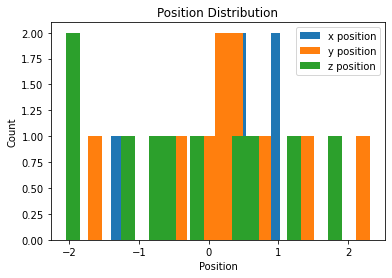

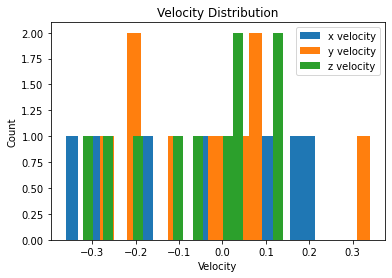

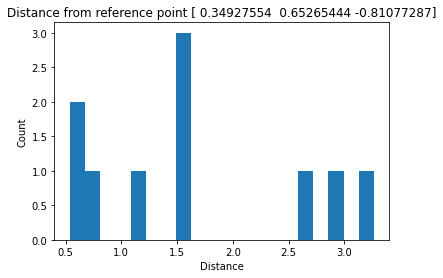

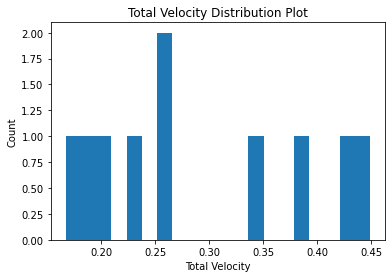

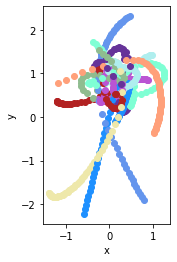

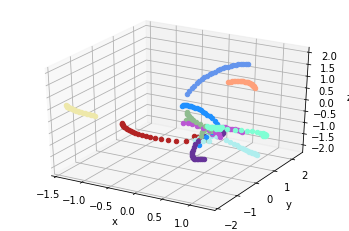

In [ ]:
# Read in data
earth_sun = read_cluster("earth_sun.csv")
three_body = read_cluster("cluster_triple_body2.csv")
ten_body = read_cluster("cluster_normal_10.csv")
hundred_body = read_cluster("cluster_normal_100.csv")

# Print all distribution plots
location_distribution_plot(ten_body, 20)
velocity_distribution_plot(ten_body, 20)
r_distribution_plot(ten_body, center_of_mass(ten_body), 20)
vtot_distribution_plot(ten_body, 20)

# Display 2D and 3D plots
final_state_2d = trajectory_2d_plot(ten_body, 0.1, 50)
final_state_3d = trajectory_3d_plot(ten_body, 0.1, 25)

In [ ]:
print(three_body)
print(evolve(three_body, 5))
print(three_body)

[{'mass': 1.0, 'position': array([-6.,  0.,  0.]), 'velocity': array([0.      , 0.816228, 0.      ])}
 {'mass': 1.0, 'position': array([-4.,  0.,  0.]), 'velocity': array([ 0.      , -0.183772,  0.      ])}
 {'mass': 2.0, 'position': array([5., 0., 0.]), 'velocity': array([ 0.      , -0.316228,  0.      ])}]
[{'mass': 1.0, 'position': array([-3.96267137,  2.13128246,  0.        ]), 'velocity': array([ 0.39011068, -0.11644649,  0.        ])}
 {'mass': 1.0, 'position': array([-5.53286016,  0.98268202,  0.        ]), 'velocity': array([-0.19262411,  0.71875283,  0.        ])}
 {'mass': 2.0, 'position': array([ 4.74776577, -1.55698224,  0.        ]), 'velocity': array([-0.09874328, -0.30115317,  0.        ])}]
[{'mass': 1.0, 'position': array([-6.,  0.,  0.]), 'velocity': array([0.      , 0.816228, 0.      ])}
 {'mass': 1.0, 'position': array([-4.,  0.,  0.]), 'velocity': array([ 0.      , -0.183772,  0.      ])}
 {'mass': 2.0, 'position': array([5., 0., 0.]), 'velocity': array([ 0.      ,

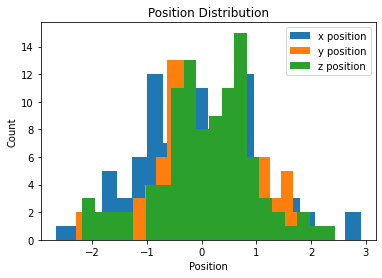

In [ ]:
location_distribution_plot(hundred_body, 20)

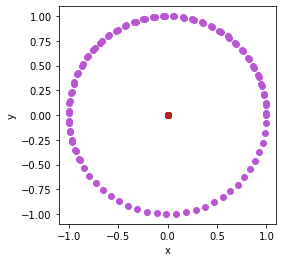

array([{'mass': 1.0, 'position': array([0.00018372, 0.00105455, 0.        ]), 'velocity': array([-5.46098388e-05,  1.83755792e-04,  0.00000000e+00])},
       {'mass': 0.0001, 'position': array([-0.83719833, -0.54547758,  0.        ]), 'velocity': array([ 0.54609839, -0.83755792,  0.        ])}],
      dtype=object)

In [ ]:
trajectory_2d_plot(earth_sun, 0.1, 100)

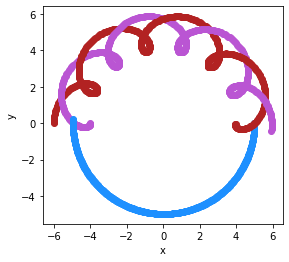

array([{'mass': 1.0, 'position': array([ 3.97856529, -0.02897086,  0.        ]), 'velocity': array([0.09477123, 0.16872765, 0.        ])},
       {'mass': 1.0, 'position': array([ 5.92451393, -0.491681  ,  0.        ]), 'velocity': array([-0.12859654, -0.8056256 ,  0.        ])},
       {'mass': 2.0, 'position': array([-4.95153961,  0.26032593,  0.        ]), 'velocity': array([0.01691265, 0.31844897, 0.        ])}],
      dtype=object)

In [ ]:
trajectory_2d_plot(three_body, 0.1, 500)

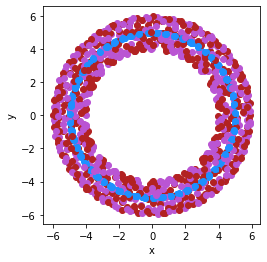

array([{'mass': 1.0, 'position': array([3.31605457, 4.72446845, 0.        ]), 'velocity': array([ 0.4940748 , -0.62415907,  0.        ])},
       {'mass': 1.0, 'position': array([1.54460566, 3.96114487, 0.        ]), 'velocity': array([0.05945235, 0.31087287, 0.        ])},
       {'mass': 2.0, 'position': array([-2.43033012, -4.34280666,  0.        ]), 'velocity': array([-0.27676358,  0.1566431 ,  0.        ])}],
      dtype=object)

In [ ]:
trajectory_2d_plot(three_body, 5, 400)

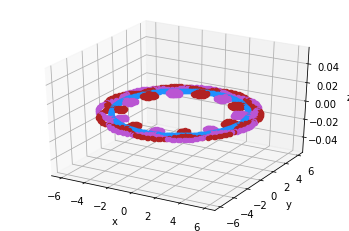

array([{'mass': 1.0, 'position': array([ 4.38847462, -0.36241501,  0.        ]), 'velocity': array([ 0.36283652, -0.10129569,  0.        ])},
       {'mass': 1.0, 'position': array([ 5.18662014, -2.21291367,  0.        ]), 'velocity': array([-0.52936781, -0.51539983,  0.        ])},
       {'mass': 2.0, 'position': array([-4.78754738,  1.28766434,  0.        ]), 'velocity': array([0.08326565, 0.30834776, 0.        ])}],
      dtype=object)

In [ ]:
trajectory_3d_plot(three_body, 0.5, 500)

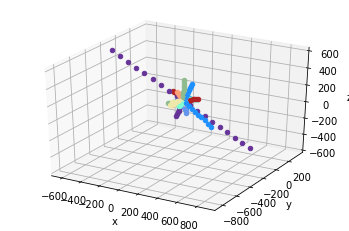

array([{'mass': 0.5739857716946292, 'position': array([1.47362654, 0.82774887, 0.24039749]), 'velocity': array([ 0.39456663, -1.06134609, -0.02122464])},
       {'mass': 0.3845450185601441, 'position': array([-1.3048762 ,  0.31279934,  1.91494855]), 'velocity': array([-0.35780709,  0.29456323,  0.43219688])},
       {'mass': 0.6366316930352217, 'position': array([2.61761487, 4.11876895, 6.46522472]), 'velocity': array([0.00485696, 0.49063929, 0.34809003])},
       {'mass': 0.7424123034581247, 'position': array([19.9276708 , -6.21863989, -2.49640332]), 'velocity': array([ 3.92328581, -1.08738167, -0.43035966])},
       {'mass': 0.4070084634484825, 'position': array([-47.86423384, -34.0074146 , 119.09981791]), 'velocity': array([-10.32708517,  -7.0012617 ,  24.9281217 ])},
       {'mass': 0.4078456651298323, 'position': array([-0.18714077, -0.25919646,  1.89451738]), 'velocity': array([-0.17103638, -0.15189199,  4.03259102])},
       {'mass': 0.9245000952647984, 'position': array([  2.17

In [ ]:
trajectory_3d_plot(hundred_body, 0.5, 10)

In [ ]:
center_of_mass(ten_body)

array([ 0.34927554,  0.65265444, -0.81077287])

In [ ]:
# Check conserved quantities
print("initial mechanical energy: " + str(mechanical_energy(ten_body)))
print("final mechanical energy: " + str(mechanical_energy(final_state_3d)))

print("initial linear momentum: " + str(linear_momentum(ten_body)))
print("final linear momentum: " + str(linear_momentum(final_state_3d)))

print("initial angular momentum: " + str(angular_momentum(ten_body, [0,0,0])))
print("final angular momentum: " + str(angular_momentum(final_state_3d, [0,0,0])))

initial mechanical energy: -1.7586915708763085
final mechanical energy: -1.7497059023823163
initial linear momentum: [-0.20085986  0.04878644 -0.10276162]
final linear momentum: [-0.20085986  0.04878644 -0.10276162]
initial angular momentum: [-0.20548305  0.18713756  0.61316743]
final angular momentum: [-0.20548305  0.18713756  0.61316743]


### Performance Calculations

The performance gain of the optimized evolve method is about 20-40%, well below the hopeful 50% improvement, probably as a result of the relatively large number of linear iterations required by the optimized method. However, 20% isn't nothing, so that's nice.

#### Performance Testing Code

In [ ]:
import time

def timeExecution(cluster, iter, optim, n=5):
  times = []
  for i in range(n):
    t1 = time.perf_counter()
    evolve(cluster, 5, iter, optimized=optim)
    t2 = time.perf_counter()
    times.append(t2 - t1)
  avg = sum(times) / n
  print("Time to execute: " + str(avg))
  return avg

def compareSpeed(cluster, n=5, iter=50):
  t1 = timeExecution(cluster, iter, False, n)
  t2 = timeExecution(cluster, iter, True, n)
  print("improvement of: " + str(100 * (1 - (t2/t1))) + "%")

#### Performance Tests

Note: executing all of these will take about five minutes. The outputs they give are listed below.

In [ ]:
compareSpeed(three_body, 500, 50)

Time to execute: 0.004628298077999375
Time to execute: 0.0036597455639997634
improvement of: 20.9267531536836%


In [ ]:
compareSpeed(three_body, 50, 500)

Time to execute: 0.04928764809999848
Time to execute: 0.039178295439995736
improvement of: 20.510925251479094%


In [ ]:
compareSpeed(hundred_body, 5, 50)

Time to execute: 5.058974991000002
Time to execute: 3.0271790489999946
improvement of: 40.162205696106525%


In [ ]:
compareSpeed(hundred_body, 5, 200)

Time to execute: 20.324518524200023
Time to execute: 11.99398125900002
improvement of: 40.98762416084292%


`[20]` Outputs:  
`Time to execute: 0.004656506646017079`  
`Time to execute: 0.0036866902200163166`   
`improvement of: 20.827124274165698%`

`[21]` Outputs:  
`Time to execute: 0.04894870170013746`  
`Time to execute: 0.03784986574013601`  
`improvement of: 22.67442357918612%`  

`[22]` Outputs:    
`Time to execute: 5.395989108799403`  
`Time to execute: 3.140879333599878`  
`improvement of: 41.79233370805085%`  

`[23]` Outputs:  
`Time to execute: 21.180574146599973`  
`Time to execute: 12.68371328739995`  
`improvement of: 40.116291467783405%`

These outputs will vary a bit from execution to execution, but generally speaking, the first pair have about a 20% increase in efficiency, while the second see a ~40% increase.  

The optimized algorithm's efficiency improvement scales up with the number of bodies, but not with the number of iterations performed on those bodies.